In [2]:
import pandas as pd

data = pd.read_csv(
    "sensor_data_200.txt",
    delimiter=" ",
    header=None,
    names=("date", "time", "ir", "lidar"),
)
data

,date,time,ir,lidar
0,20180122,95819,305,214
1,20180122,95822,299,211
2,20180122,95826,292,199
3,20180122,95829,321,208
4,20180122,95832,298,212
...,...,...,...,...
58983,20180124,120023,313,208
58984,20180124,120026,297,200
58985,20180124,120030,323,204
58986,20180124,120033,326,207


In [3]:
print(data["lidar"][0:5])

0    214
1    211
2    199
3    208
4    212
Name: lidar, dtype: int64


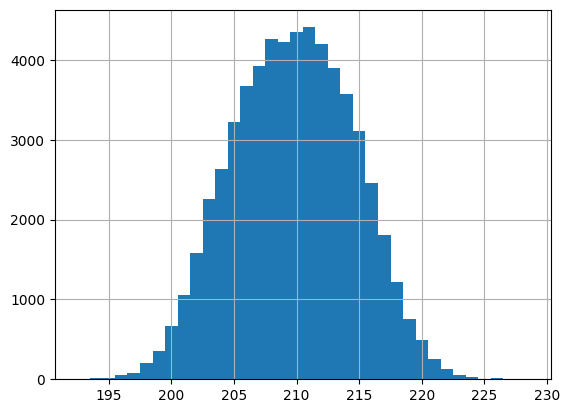

In [4]:
import matplotlib.pyplot as plt

data["lidar"].hist(bins=max(data["lidar"]) - min(data["lidar"]), align="left")
plt.show()

In [6]:
mean = data["lidar"].mean()
print(mean)

209.73713297619855


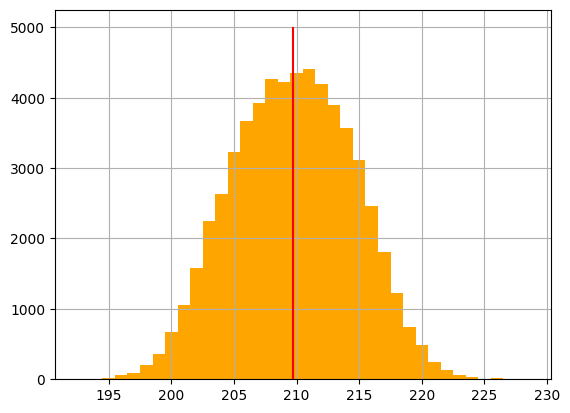

In [12]:
data["lidar"].hist(
    bins=max(data["lidar"]) - min(data["lidar"]), color="orange", align="left"
)
plt.vlines(mean, ymin=0, ymax=5000, colors="red")
plt.show()

In [14]:
# 分散
pandas_sampling_var = data["lidar"].var(ddof=False)
pandas_default_var = data["lidar"].var()

print(pandas_sampling_var, pandas_default_var)

23.4077097702742 23.408106598554504


In [15]:
# 標準偏差
pandas_stddev = data["lidar"].std()

print(pandas_stddev)

4.838192492920729


### 2.2.4 確率分布


In [16]:
freqs = pd.DataFrame(data["lidar"].value_counts())
freqs.transpose()

,211,210,208,209,212,207,213,206,214,205,...,197,196,223,224,226,195,194,193,227,229
lidar,4409,4355,4261,4228,4201,3920,3897,3674,3572,3225,...,84,59,55,32,15,13,10,4,3,1


In [18]:
freqs["probs"] = freqs["lidar"] / len(data["lidar"])
freqs.transpose()

,211,210,208,209,212,207,213,206,214,205,...,197,196,223,224,226,195,194,193,227,229
lidar,4409.000000,4355.000000,4261.000000,4228.000000,4201.000000,3920.000000,3897.000000,3674.000000,3572.000000,3225.000000,...,84.000000,59.000,55.000000,32.000000,15.000000,13.00000,10.00000,4.000000,3.000000,1.000000
probs,0.074744,0.073829,0.072235,0.071676,0.071218,0.066454,0.066064,0.062284,0.060555,0.054672,...,0.001424,0.001,0.000932,0.000542,0.000254,0.00022,0.00017,0.000068,0.000051,0.000017


In [19]:
sum(freqs["probs"])

1.0

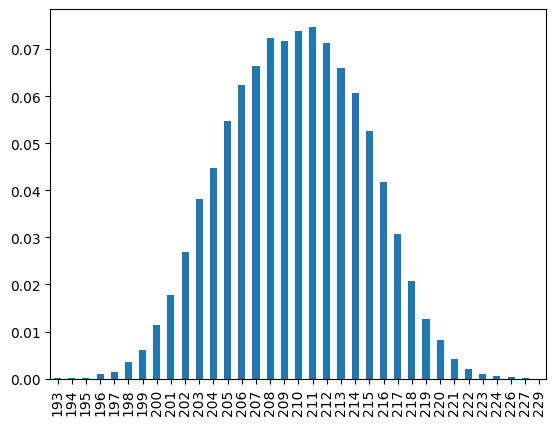

In [22]:
freqs["probs"].sort_index().plot.bar()
plt.show()

### 2.2.5 確率分布を用いたシミュレーション


In [26]:
def drawing():
    return freqs.sample(n=1, weights="probs").index[0]


drawing()

210

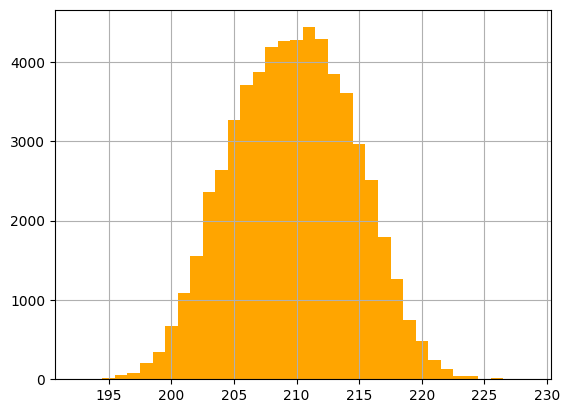

In [32]:
samples = [drawing() for i in range(len(data))]
simulated = pd.DataFrame(samples, columns=["lidar"])
p = simulated["lidar"]
p.hist(bins=max(p) - min(p), color="orange", align="left")
plt.show()